#This code is provided for you to generate your data and split it into training and testing sets.  Do not modify.  Just run.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Generate random data for demonstration
TRUE_SLOPE = 1.75
TRUE_INTERCEPT = 1
RAND_SCALE = 0.1
RAND_SEED = 0
np.random.seed(RAND_SEED)
X = np.random.rand(100, 1)  # Feature (input)
#sort so graphs come out better
y = TRUE_SLOPE * X + TRUE_INTERCEPT + RAND_SCALE * np.random.randn(100, 1)  # Target variable (output) with some noise


#Start your code below here

# 2

In [3]:
# Split the data into training (80%) and testing (20%) sets
TEST_SIZE_PERCENT = 0.2
test_start_index = int((1-TEST_SIZE_PERCENT) * len(X)) #from 80% index to 100% index (20% total) for testing
X_train = X[:test_start_index]
X_test = X[test_start_index:]
y_train = y[:test_start_index]
y_test = y[test_start_index:]

# 3. A

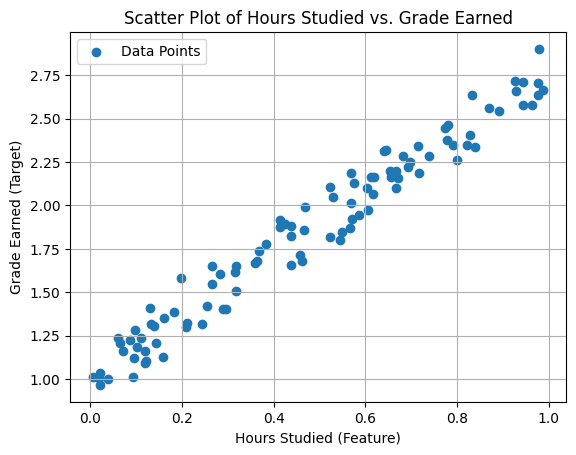

In [4]:
# # Plot the data points
plt.scatter(X, y, label='Data Points')

# # # Plot the basis linear relationship without noise
# # plt.plot( X, y_line, color='red',
# #          #linewidth=1,
# #          label='Basis Linear Relationship of Randomly Generated Numbers')

plt.xlabel('Hours Studied (Feature)')
plt.ylabel('Grade Earned (Target)')
plt.title('Scatter Plot of Hours Studied vs. Grade Earned')
plt.legend()
plt.grid(True)
plt.show()



# 3. B

In [5]:
def z_score_normalize_features(X_train,
                       #X_val,
                       X_test):
    mean_X = np.mean(X_train, axis=0)
    std_X = np.std(X_train, axis=0)
    X_normalized_train = (X_train - mean_X) / std_X
    #X_normalized_val = (X_val - mean_X) / std_X
    X_normalized_test = (X_test - mean_X) / std_X
    #return X_normalized_train, X_normalized_val, X_normalized_test, mean_X, std_X
    return X_normalized_train, X_normalized_test, mean_X, std_X



In [6]:
X_train, X_test, mean_X, std_X = z_score_normalize_features(X_train, X_test)

#4

In [7]:
# I am Bulding a liner regression from Scratch

# Initialize parameters
m=0 #slope
b=0 #intercept
learning_rate = 0.25
epochs = 50
mse_history = [] # to store cost values

#Defining the cost Function

def compute_cost(X,y,m,b):
  n = len(y)
  prediction = m*X +b # Predicted values
  cost = (1/(2*n)) *np.sum((prediction -y)**2)
  return cost

#Implementing Gradient Descent

def gradient_descent(X, y, m, b, learning_rate, epochs):
    n = len(y)
    mse_history = []

    for i in range(epochs):
        predictions = m * X + b
        error = predictions - y

        # Compute gradients (partial derivatives)
        dm = (1/n) * np.sum(error * X)  # Partial derivative w.r.t. m
        db = (1/n) * np.sum(error)      # Partial derivative w.r.t. b

        # Update parameters using gradient descent formulas
        m -= learning_rate * dm
        b -= learning_rate * db

        # Compute cost for this iteration and store it
        cost = compute_cost(X, y, m, b)
        mse_history.append(cost)


    return m, b, mse_history


In [8]:
#Training the model

m_final, b_final, mse_history = gradient_descent(X_train, y_train, m, b, learning_rate, epochs)


In [9]:
#make predictions

y_pred = m_final * X_test + b_final

In [10]:
#Evaluate Model Performance

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nFinal Model:")
print(f"Slope (m): {m_final}")
print(f"Intercept (b): {b_final}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")



Final Model:
Slope (m): 0.5050396511539869
Intercept (b): 1.8788542310042518
Mean Squared Error: 0.009000772111714496
R² Score: 0.9611092348519975


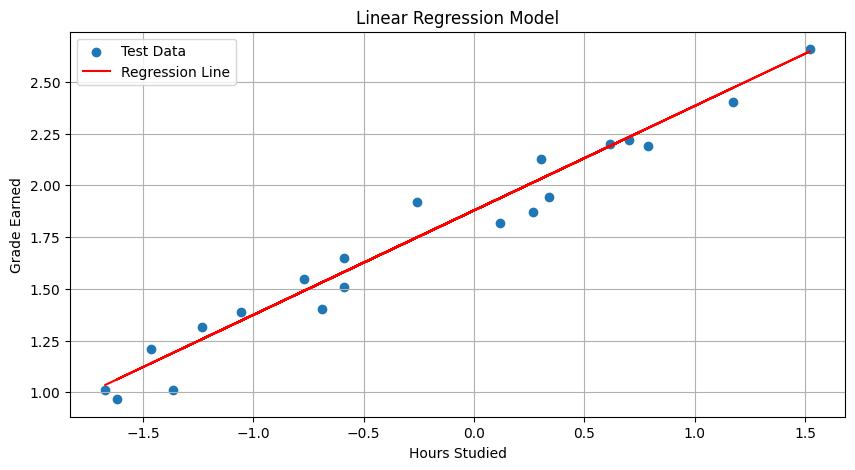

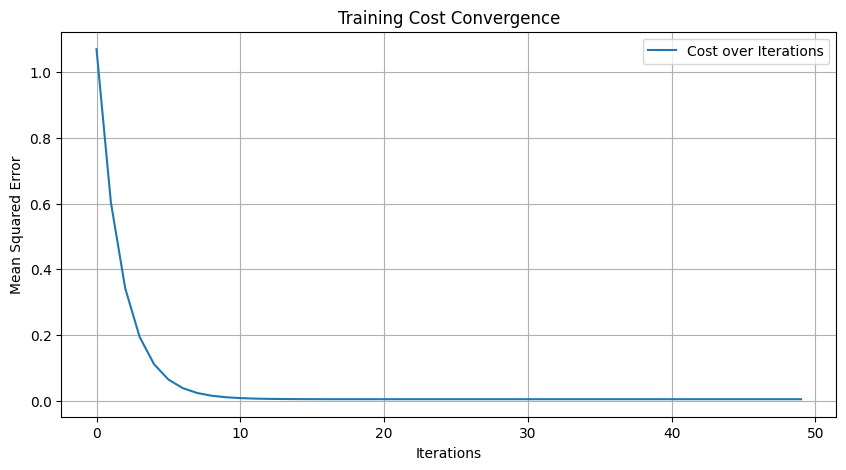

Training Time: 0.000038 seconds
Training Epochs: 50
Mean Squared Error: 0.009000772111714496
R-squared (R^2) Score: 0.9611092348519975


In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Grade Earned')
plt.title('Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(epochs), mse_history, label='Cost over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training Cost Convergence')
plt.legend()
plt.grid(True)
plt.show()

# Print training outcomes

# Start measuring training time
start_time = time.time()

# Stop measuring training time
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time:.6f} seconds")
print("Training Epochs:", len(mse_history))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Print the MSE
print("Mean Squared Error:", mse)

# Calculate the R-squared (R^2) score
r2 = r2_score(y_test, y_pred)
# Print the R^2 score
print("R-squared (R^2) Score:", r2)


For student who are either genius or had prior experience with the subject, we would expect them to perform well even with less study hour. This means that for lower values of study hours (X-axis), their grades (Y-axis) could be very high. In the scatterplot, their data points will likely be above the general trend of the linear regression line, especially in the lower study hours range. The impact would be they would create a outliers to the dataset

For student who tried hard but struggled to perform well, their data points would likely be clustered in the higher study hours range but with relatively low grades.
In the scatterplot, these data points will be below the regression line, indicating that despite investing time in studying, their performance was not as expected.
This would introduce negative residuals. The model might overestimate the grades for students who study a lot but don't perform well, leading to lower prediction accuracy for this group of students. The regression line could become slightly less accurate for students with higher study hours.

If the outliers don't represent valid cases, they can be removed.
If the outliers are valid, you could apply transformations e.g..transformation to reduce their impact.
If you suspect outliers are important, you could opt for models that are less sensitive to outliers, such as Lasso Regression, which can prevent the model from overfitting on outliers.
We need to be careful removing too many outliers can reduce the diversity of your dataset and lead to a biased model.